In [43]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical 
import os
import numpy as np

In [44]:
# seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [45]:
# 나중에 지정될 변수의 값을 미리 세팅
BATCH_SIZE = 32
NUM_CLASSES = 10
EPOCHS = 100
DATA_AUGMENTATION = True
NUM_PREDICTIONS = 20
SAVE_DIR = os.path.join(os.getcwd(), 'model')

In [46]:
# data to train,test
(x_train, y_train0),(x_test,y_test0) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [47]:
y_test0[0]

array([3], dtype=uint8)

### 데이터 확인

In [48]:
import matplotlib.pyplot as plt
import matplotlib as mlt
%matplotlib inline

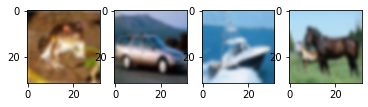

In [49]:
plt.subplot(141)
plt.imshow(x_train[0], interpolation='bicubic')
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation='bicubic')
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation='bicubic')
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation='bicubic')
plt.grid(False)
plt.show()

In [50]:
# 자료형을 실수로 변환한 후 정규화
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [51]:
# one-hot인코딩
y_train = to_categorical(y_train0, NUM_CLASSES)
y_test = to_categorical(y_test0, NUM_CLASSES)

In [52]:
y_train0.shape,y_test0.shape

((50000, 1), (10000, 1))

In [53]:
model = Sequential([
                    Conv2D(32,(3,3),padding='same',
                           input_shape=x_train.shape[1:], activation='relu'),
                    Conv2D(32,(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.25),
                    Conv2D(64,(3,3),activation='relu'),
                    Conv2D(64,(3,3),padding='same',activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.25),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dropout(0.5),
                    Dense(NUM_CLASSES,activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

In [54]:
# initiate Rmsprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [55]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics = ['accuracy'])

In [56]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [57]:
modelpath = "model/cifar10-aug-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=10)

In [58]:
datagen=ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False, 
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=0, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    brightness_range=None, 
    shear_range=0.0, 
    zoom_range=0.0, 
    channel_shift_range=0.0, 
    fill_mode='nearest', 
    cval=0.0, 
    horizontal_flip=True, 
    vertical_flip=False, 
    rescale=None, 
    preprocessing_function=None, 
    data_format=None, 
    validation_split=0.0
)
datagen.fit(x_train)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(
    x_train, y_train, stratify=y_train,test_size=0.2, random_state=seed
)

In [61]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
          epochs=EPOCHS,
          shuffle=True,
          validation_data=(x_valid, y_valid),
          callbacks=[early_stopping_callback,checkpointer])

Epoch 1/100
1250/1250 [==============================] - 21s 16ms/step - loss: 2.0837 - accuracy: 0.2199 - val_loss: 1.6386 - val_accuracy: 0.4135

Epoch 00001: val_loss improved from inf to 1.63860, saving model to model/cifar10-aug-01-1.6386.hdf5
Epoch 2/100
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6938 - accuracy: 0.3845 - val_loss: 1.4756 - val_accuracy: 0.4617

Epoch 00002: val_loss improved from 1.63860 to 1.47557, saving model to model/cifar10-aug-02-1.4756.hdf5
Epoch 3/100
1250/1250 [==============================] - 20s 16ms/step - loss: 1.5580 - accuracy: 0.4304 - val_loss: 1.3766 - val_accuracy: 0.5023

Epoch 00003: val_loss improved from 1.47557 to 1.37663, saving model to model/cifar10-aug-03-1.3766.hdf5
Epoch 4/100
1250/1250 [==============================] - 20s 16ms/step - loss: 1.4664 - accuracy: 0.4631 - val_loss: 1.3435 - val_accuracy: 0.5170

Epoch 00004: val_loss improved from 1.37663 to 1.34350, saving model to model/cifar10-aug-04-1.34

In [64]:
from tensorflow.keras.models import load_model
best_model2 = load_model('model/cifar10-aug-56-0.6608.hdf5')

In [65]:
acc = best_model2.evaluate(x_test, y_test)
print(f"Accuracy: {acc[1]:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.6777 - accuracy: 0.7737
Accuracy: 0.7737


In [67]:
# 검증셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']

# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

In [66]:
import numpy as np

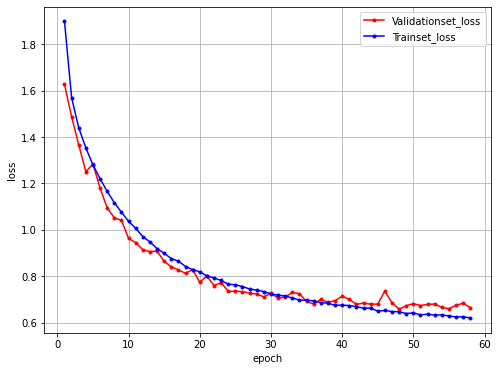

In [ ]:


# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model.predict(x_test)[0], y_test0[0]

(array([5.15804393e-04, 2.55373811e-06, 6.41767867e-04, 9.27608550e-01,
        6.53983661e-05, 6.67902678e-02, 2.68052868e-03, 1.06986823e-04,
        1.57322770e-03, 1.47621195e-05], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

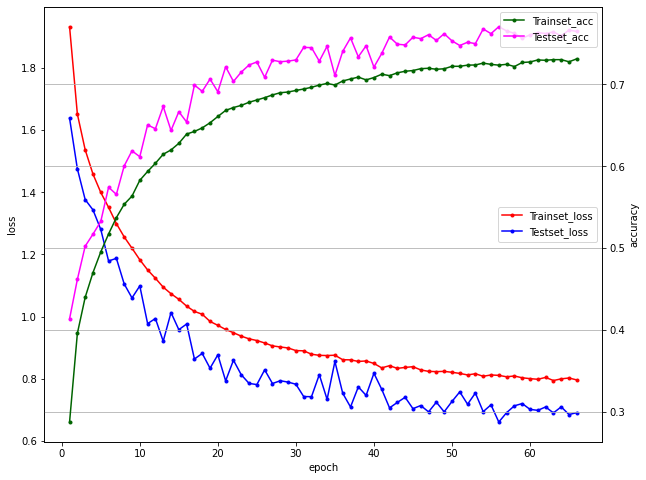

In [71]:
x_len = np.arange(1, len(y_loss)+1)
fig,ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, marker='.', c="red", label='Trainset_loss')
ax0.plot(x_len, y_vloss, marker='.', c="blue", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, marker='.', c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, marker='.', c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='center right')
ax1.legend(loc='upper right')
plt.grid()
plt.show;